# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [88]:
# import libraries hereimport pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [9]:
# YOUR CODE HERE
temp = pd.read_csv("Temp_States.csv")
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


In [11]:
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


In [54]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Print `temp`

In [13]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [17]:
# YOUR CODE HERE

datatype = temp.dtypes
print(datatype)

#Tenemos datos tipo objetos (strings) para la Ciudad y el Estado, pero tipo float para la temperatura 
#(nos permite hacer cálculos matemáticos).

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [20]:
# YOUR CODE HERE
ny_data = temp[temp["State"] == "New York"]
print(ny_data)


      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [34]:
# YOUR CODE HERE
mean_temp = ny_data["Temperature"].mean()
print(f"La temperatura media en las ciudades del estado de Nueva York es de {mean_temp:.1f} grados centígrados.")

La temperatura media en las ciudades del estado de Nueva York es de 10.7 grados centígrados.


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [38]:
# your answer here
higher_temps = temp[temp["Temperature"]>15]
temp_quince = higher_temps[["City", "State", "Temperature"]]
print(temp_quince)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [44]:
# YOUR CODE HERE
higher_temps2 = temp[temp["Temperature"]>15]
temp_quince2 = higher_temps2["City"]
print(temp_quince2)

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [52]:
# YOUR CODE HERE
condicion = (temp["Temperature"] > 15.0) & (temp["Temperature"] < 20.1)

inbetween = temp[condicion]

result_inbetween = inbetween["City"]

print(result_inbetween)

0         NYC
3    Hartford
6      Newark
Name: City, dtype: object


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [58]:
# YOUR CODE HERE_
estadisticas_temp = temp.groupby("State")["Temperature"].agg(["mean","std"]).reset_index()

print(estadisticas_temp)

         State       mean       std
0  Connecticut  15.833333  1.964186
1   New Jersey  21.111111  1.571348
2     New York  10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [5]:
# YOUR CODE HERE
employee = pd.read_csv("employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [7]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


In [9]:
print(employee)

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [13]:
# YOUR CODE HERE
emp_datatype = employee.dtypes
print(emp_datatype)

#Las columnas que almacenan nombres, departamentos, niveles educativos, género y títulos del empleado a través de Objects (strings).
#Las dos columnas de Years y Salary son tipo int63 e indican la antigüedad y el salario del empleado.

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

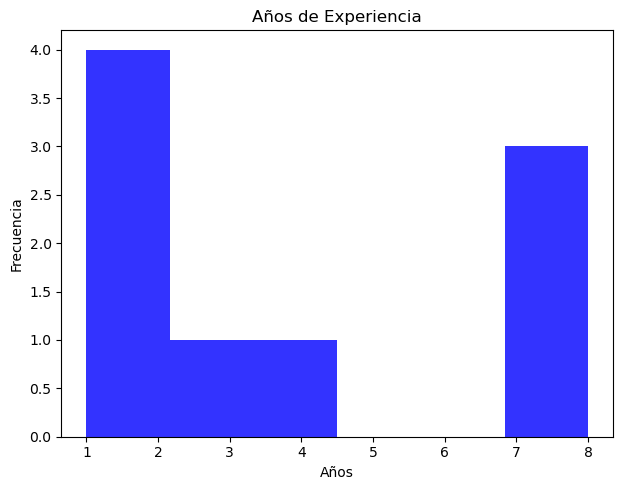

In [28]:
# YOUR CODE HERE

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(employee["Years"], bins=6, color="blue", alpha = 0.8)
plt.title("Años de Experiencia")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


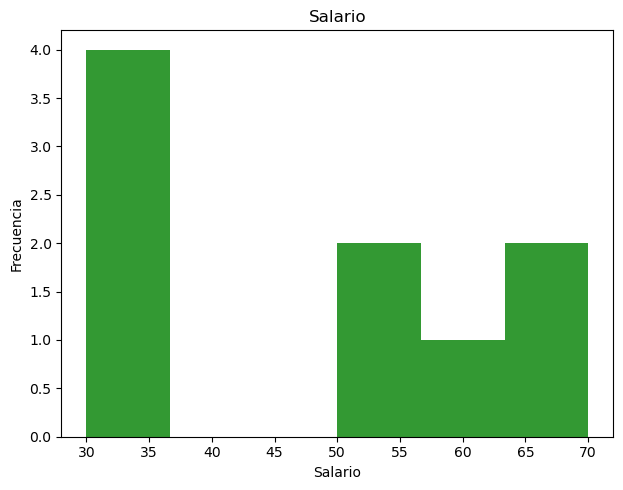

In [30]:
# YOUR CODE HERE
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.hist(employee["Salary"], bins=6, color="green", alpha = 0.8)
plt.title("Salario")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [ ]:
# your answer here
Los histogramas nos muestra que en el de Experiencia, la mayoría de empleados tienen una antigüedad
entre 1 y 4 años, y una cantidad de 3 empleados con una antigüedad de 7 u 8 años. En el de Salario 
observamos que la gran mayoría ganan entre 30 y 35, y con algunos roles en los que se hay salarios 
partiendo de 50 hasta 70. 

#### ¿Cuál es el salario medio en esta empresa?

In [32]:
# YOUR CODE HERE
salario_medio = employee["Salary"].mean()
print(f"El salario medio en la empresa es de {salario_medio}.")

El salario medio en la empresa es de 48.888888888888886


#### ¿Cuál es el salario más alto?

In [34]:
# YOUR CODE HERE
hi_salary = employee["Salary"].max()
print(f"El salario más alto en la empresa es de {hi_salary}.")

El salario medio en la empresa es de 70


#### ¿Cuál es el salario más bajo?

In [36]:
# YOUR CODE HERE
low_salary = employee["Salary"].min()
print(f"El salario más bajo en la empresa es de {low_salary}.")

El salario más bajo en la empresa es de 30.


#### ¿Quiénes son los empleados con el salario más bajo?

In [38]:
# YOUR CODE HERE
low_salary = employee["Salary"].min()
emp_low_salary = employee[employee["Salary"] == low_salary]

print("Empleados con el salario más bajo:")
print(emp_low_salary)

Empleados con el salario más bajo:
    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [40]:
# YOUR CODE HERE
emp_David = employee[employee["Name"] == "David"]
print(emp_David)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [50]:
# YOUR CODE HERE
emp_David_sal = employee.loc[employee["Name"] == "David", "Salary"].values[0]
print(f"El salario de David es de {emp_David_sal}")

El Salrio de David es: 30


#### Printea todas las líneas en las que el cargo es asociado

In [52]:
# YOUR CODE HERE
emp_asociado = employee[employee["Title"] == "associate"]
print(emp_asociado)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [54]:
# YOUR CODE HERE
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [56]:
# YOUR CODE HERE
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [58]:
# YOUR CODE HERE
higher_ups = employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]
print(higher_ups)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [60]:
# YOUR CODE HERE
mean_year_salary = employee.groupby("Years")["Salary"].mean().reset_index()
print(mean_year_salary)

   Years     Salary
0      1  35.000000
1      2  38.333333
2      3  55.000000
3      4  35.000000
4      7  60.000000
5      8  70.000000


#### ¿Cuál es el salario medio por título?

In [62]:
# YOUR CODE HERE
mean_title_salary = employee.groupby("Title")["Salary"].mean().reset_index()
print(mean_title_salary)

       Title     Salary
0         VP  70.000000
1    analyst  32.500000
2  associate  56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

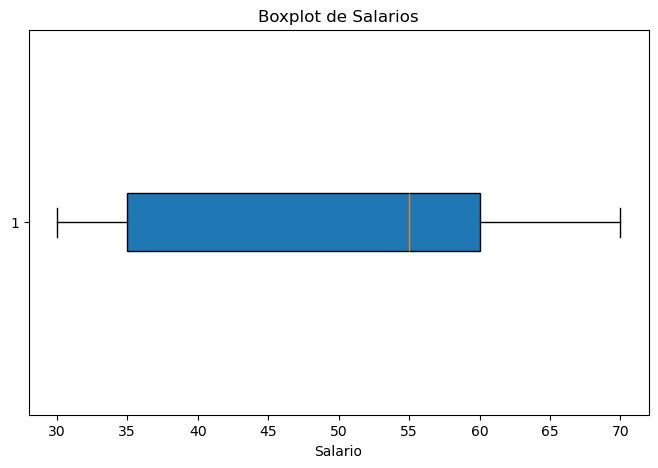

In [76]:
# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.boxplot(employee["Salary"], patch_artist=True, vert=False)
plt.title("Boxplot de Salarios")
plt.xlabel("Salario")
plt.show()

In [78]:
# print first quartile here
cuartiles = employee["Salary"].quantile([0.25,0.75])
print(f"Cuartil primero (Q1): {cuartiles[0.25]}")

Cuartil primero (Q1): 35.0


In [82]:
# print third quartile here
cuartiles = employee["Salary"].quantile([0.25,0.75])
print(f"Cuartil primero (Q3): {cuartiles[0.75]}")

Cuartil primero (Q3): 60.0


#### ¿Es diferente el salario medio por género?

In [84]:
# your answer here
gender_mean_salary = employee.groupby("Gender")["Salary"].mean().reset_index()
print(gender_mean_salary)

  Gender  Salary
0      F    47.5
1      M    50.0


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [90]:
# your answer here
column_dep = employee.groupby("Department")[['Years', 'Salary']].agg(["min", "mean", "max"]).reset_index()
print(column_dep)

  Department Years               Salary           
               min      mean max    min   mean max
0         HR     2  4.666667   8     30  45.00  70
1         IT     1  4.500000   8     30  48.75  70
2      Sales     2  2.500000   3     55  55.00  55


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [94]:
# your answer here
salary_diff_agg = employee.groupby("Department")["Salary"].agg(["min","max"])
salary_diff_agg["diferencia"] = salary_diff_agg["max"] - salary_diff_agg["min"]

print(salary_diff_agg[["max", "min", "diferencia"]])

            max  min  diferencia
Department                      
HR           70   30          40
IT           70   30          40
Sales        55   55           0


In [96]:
salary_diff_lamb = employee.groupby("Department")["Salary"].apply(lambda x: x.max() - x.min())
print(salary_diff_lamb)

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [98]:
# your answer here
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [102]:
# your answer here
orders.info()

"""
Encontramos un total de 397,924 entradas. 
8 columnas con int64, números enteros. 
2 columnas con float64, números decimales.
4 columnas con object, strings.
No hay data faltante. 
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [100]:
# your answer here
orders.describe()

"""
Encontramos cantidad de producto vendido y toda la información sobre el pedido, precio unitario, 
el promedio y el máximo y minimo de precio de los productos, y el total gastado que nos da información 
del gasto medio y la variabilidad de las transacciones. 
"""

<bound method NDFrame.describe of         Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0                0     536365    85123A  2010     12    3     8   
1                1     536365     71053  2010     12    3     8   
2                2     536365    84406B  2010     12    3     8   
3                3     536365    84029G  2010     12    3     8   
4                4     536365    84029E  2010     12    3     8   
...            ...        ...       ...   ...    ...  ...   ...   
397919      541904     581587     22613  2011     12    5    12   
397920      541905     581587     22899  2011     12    5    12   
397921      541906     581587     23254  2011     12    5    12   
397922      541907     581587     23255  2011     12    5    12   
397923      541908     581587     22138  2011     12    5    12   

                                Description  Quantity          InvoiceDate  \
0        white hanging heart t-light holder         6  2010-12-01 08:26:00   
1    

#### ¿Cuál es el precio medio de compra?

In [110]:
# your answer here
mean_price = orders["UnitPrice"].mean()
print(f"El precio medio de compra total es de {mean_price:.2f}")

El precio medio de compra total es de 3.12


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [122]:
# your answer here
max_price = orders["UnitPrice"].max()
print(f"El precio máximo de compra ha sido de {max_price:.2f}")
max_product = orders[orders["UnitPrice"] == max_price]["Description"].values[0]
print(max_product)

El precio máximo de compra ha sido de 8142.75


In [116]:
# your answer here
min_price = orders["UnitPrice"].min()
print(f"El precio mínimo de compra ha sido de {min_price:.2f}")

El precio mínimo de compra ha sido de 0.00


#### Seleccione todos los clientes que tenemos en España

In [128]:
# your answer here
ESP_clients= orders[orders["Country"] == "Spain"]
print(ESP_clients)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  20

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [132]:
# your answer here
num_ESP_clients= ESP_clients["CustomerID"].value_counts().count()
print(f"El número de clientes de España es de {num_ESP_clients}")

El número de clientes de España es de 30


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [142]:
# your answer here
big_orders = orders[orders["Quantity"]>50]
big_orders_clients = big_orders["CustomerID"].value_counts()
print("Clientes que han comprado más de 50 artículos:")
print(big_orders_clients)

Clientes que han comprado más de 50 artículos:
CustomerID
14646    1266
12415     454
17511     431
13694     370
14156     309
         ... 
15306       1
17948       1
16813       1
16511       1
16446       1
Name: count, Length: 1301, dtype: int64


#### Selecciona pedidos de España superiores a 50 artículos

In [146]:
# your answer here
big_orders_ESP = orders[(orders["Country"] == "Spain") & (orders["Quantity"]>50)]
print("Clientes españoles que han comprado más de 50 artículos:")
print(big_orders_ESP)

Clientes españoles que han comprado más de 50 artículos:
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
17444

#### Seleccionar todos los pedidos gratuitos

In [150]:
# your answer here
free_orders = orders[orders["amount_spent"] == 0]
print(free_orders)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [160]:
# your answer here
lunch_bag = orders[orders["Description"].str.contains("lunch bag", case=False, na=False)]
print(lunch_bag)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [210]:
# your answer here
orders["year"] = pd.to_numeric(orders["year"], errors = "coerce")
orders_2011 = orders[(orders["year"] == "2011") & (orders["Description"].str.contains("lunch bag", case=False, na=False))]

print(orders_2011)

Empty DataFrame
Columns: [Unnamed: 0, InvoiceNo, StockCode, year, month, day, hour, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, amount_spent]
Index: []


#### Muestra la distribución de frecuencias del importe gastado en España.

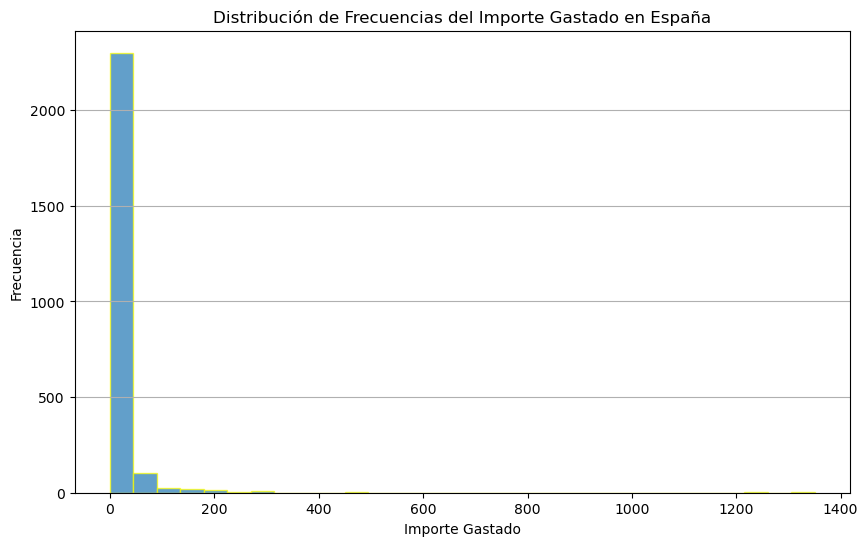

In [188]:
# your answer here
ESP_clients= orders[orders["Country"] == "Spain"]

plt.figure(figsize=(10, 6))
plt.hist(ESP_clients['amount_spent'], bins=30, edgecolor='yellow', alpha=0.7)
plt.title('Distribución de Frecuencias del Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


#### Seleccione todos los pedidos realizados en el mes de agosto

In [192]:
# your answer here
august_orders = orders[orders["month"] == 8]
print(august_orders)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476            scandinavian reds rib

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [194]:
# your answer here
country_august_orders = august_orders["Country"].value_counts()
print(country_august_orders)

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64


#### ¿Cuál es el gasto medio por país?

In [204]:
# your answer here
gasto_medio_pais = orders.groupby("Country")["amount_spent"].mean().reset_index()
gasto_medio_pais.columns = ["Country", "Gasto Medio"]
print(gasto_medio_pais)

                 Country  Gasto Medio
0              Australia   116.895620
1                Austria    25.624824
2                Bahrain    32.258824
3                Belgium    20.283772
4                 Brazil    35.737500
5                 Canada    24.280662
6        Channel Islands    27.340160
7                 Cyprus    22.134169
8         Czech Republic    33.069600
9                Denmark    49.882474
10                  EIRE    36.687745
11    European Community    21.670833
12               Finland    32.913985
13                France    25.056827
14               Germany    25.311562
15                Greece    32.831172
16               Iceland    23.681319
17                Israel    29.119718
18                 Italy    23.064960
19                 Japan   116.561900
20               Lebanon    37.641778
21             Lithuania    47.458857
22                 Malta    24.335625
23           Netherlands   120.798282
24                Norway    33.736418
25          

#### ¿Cuál es el artículo más caro?

In [208]:
# your answer here
index_max_price_product = orders["UnitPrice"].idxmax()
max_price_product = orders.loc[index_max_price_product]
print(max_price_product)

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object


#### ¿Cuál fue la cantidad media gastada al año?

In [212]:
# your answer here
mean_gastado_año = orders.groupby("year")["amount_spent"].mean().reset_index()
mean_gastado_año.columns = ["Year", "Media Gastada"]
print(mean_gastado_año)


   Year  Media Gastada
0  2010      21.892733
1  2011      22.430074
